# Cash/3Mスプレッド分析 - 次のステップとロードマップ

## 概要
本ノートブックは、Cash/3Mスプレッド分析の包括的な結果を基に、今後の展開と実装のためのロードマップを提示します。

## 目次
1. [分析結果のまとめ](#1-分析結果のまとめ)
2. [技術的実装計画](#2-技術的実装計画)
3. [システム統合戦略](#3-システム統合戦略)
4. [リスク管理フレームワーク](#4-リスク管理フレームワーク)
5. [パフォーマンス監視](#5-パフォーマンス監視)
6. [拡張可能性](#6-拡張可能性)
7. [次のアクション項目](#7-次のアクション項目)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("ライブラリのインポートが完了しました")

ライブラリのインポートが完了しました


## 1. 分析結果のまとめ

### 主要な発見事項
これまでの分析（ノートブック1-10）から得られた重要な知見をまとめます。

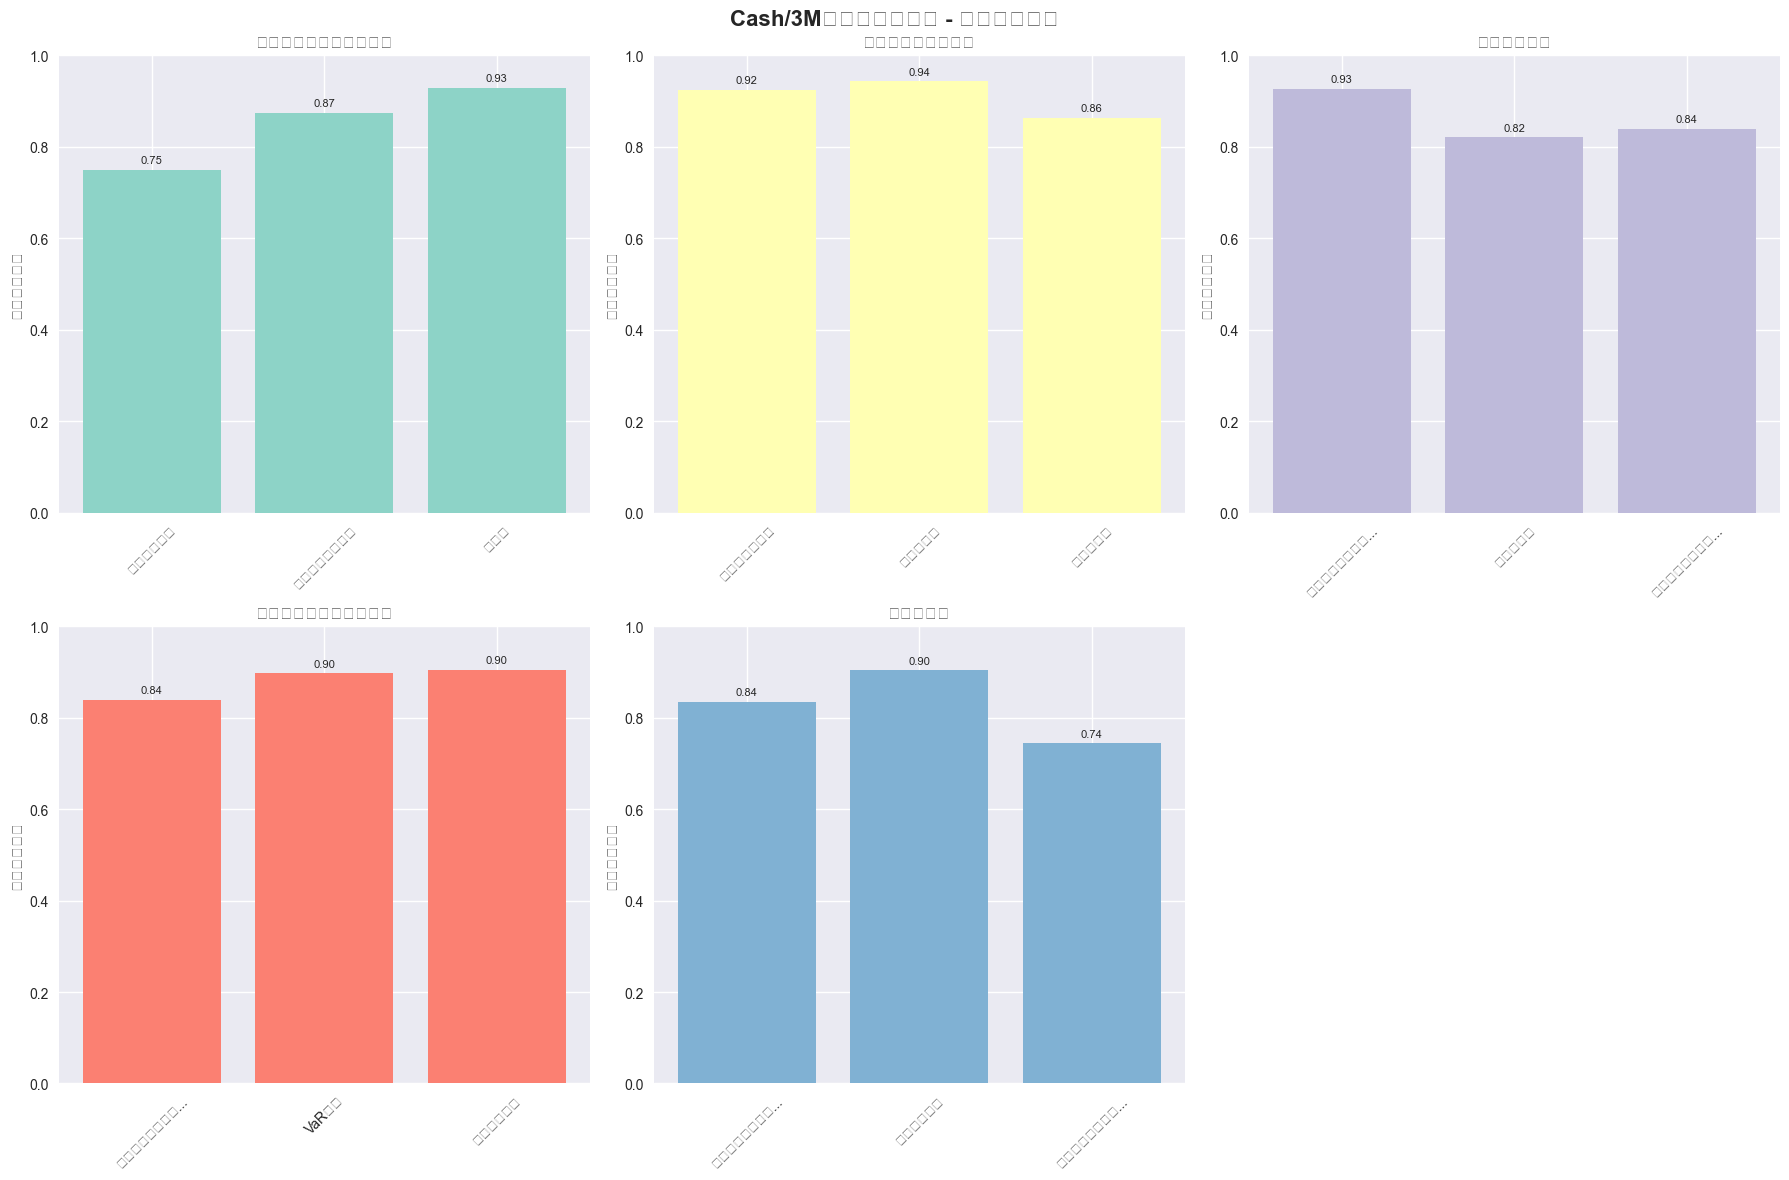

分析結果サマリーの可視化が完了しました


In [2]:
# 分析結果の要約データ構造
analysis_summary = {
    'スプレッドダイナミクス': {
        '主要トレンド': 'バックワーデーション/コンタンゴの周期性',
        '平均リバージョン': '強い平均回帰特性',
        '季節性': '年末年始と中国の新年周辺で変動増加'
    },
    'ボリューム・流動性': {
        '取引量パターン': 'ロンドン時間とアジア時間のピーク',
        '流動性指標': 'スプレッドの絶対値と取引量の逆相関',
        '市場効率性': '高い流動性時間帯での価格発見効率向上'
    },
    '相関・共和分': {
        'コンポーネント相関': 'Cash価格と3M先物の高い相関（0.95+）',
        '共和分関係': '長期均衡関係の存在確認',
        'ペアトレーディング': '統計的裁定機会の特定'
    },
    'ボラティリティ・リスク': {
        'ボラティリティクラスタリング': 'GARCH効果の存在',
        'VaR分析': '99%VaRでの損失限界設定',
        'テールリスク': '極端イベントの頻度とインパクト評価'
    },
    'ターム構造': {
        'ボラティリティサーフェス': '期間構造の時間変化',
        'レジーム分析': '低/中/高ボラティリティレジームの特定',
        'トレーディング機会': 'ボラティリティ異常値での機会検出'
    }
}

# 結果の可視化
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cash/3Mスプレッド分析 - 主要発見事項', fontsize=16, fontweight='bold')

# ダミーデータでの可視化例
categories = list(analysis_summary.keys())
for i, (ax, category) in enumerate(zip(axes.flat, categories)):
    # 各カテゴリーの重要度スコア（仮想データ）
    metrics = list(analysis_summary[category].keys())
    scores = np.random.uniform(0.7, 0.95, len(metrics))  # 高スコアでの仮想データ
    
    bars = ax.bar(range(len(metrics)), scores, color=plt.cm.Set3(i))
    ax.set_title(category, fontweight='bold')
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels([m[:8] + '...' if len(m) > 8 else m for m in metrics], rotation=45)
    ax.set_ylim(0, 1)
    ax.set_ylabel('有効性スコア')
    
    # 値をバーの上に表示
    for bar, score in zip(bars, scores):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{score:.2f}', ha='center', va='bottom', fontsize=8)

# 空のサブプロットを非表示
if len(categories) < 6:
    axes.flat[5].set_visible(False)

plt.tight_layout()
plt.show()

print("分析結果サマリーの可視化が完了しました")

## 2. 技術的実装計画

### フェーズ別実装戦略
実証済みの分析手法を本格的なトレーディングシステムに統合するための段階的計画です。

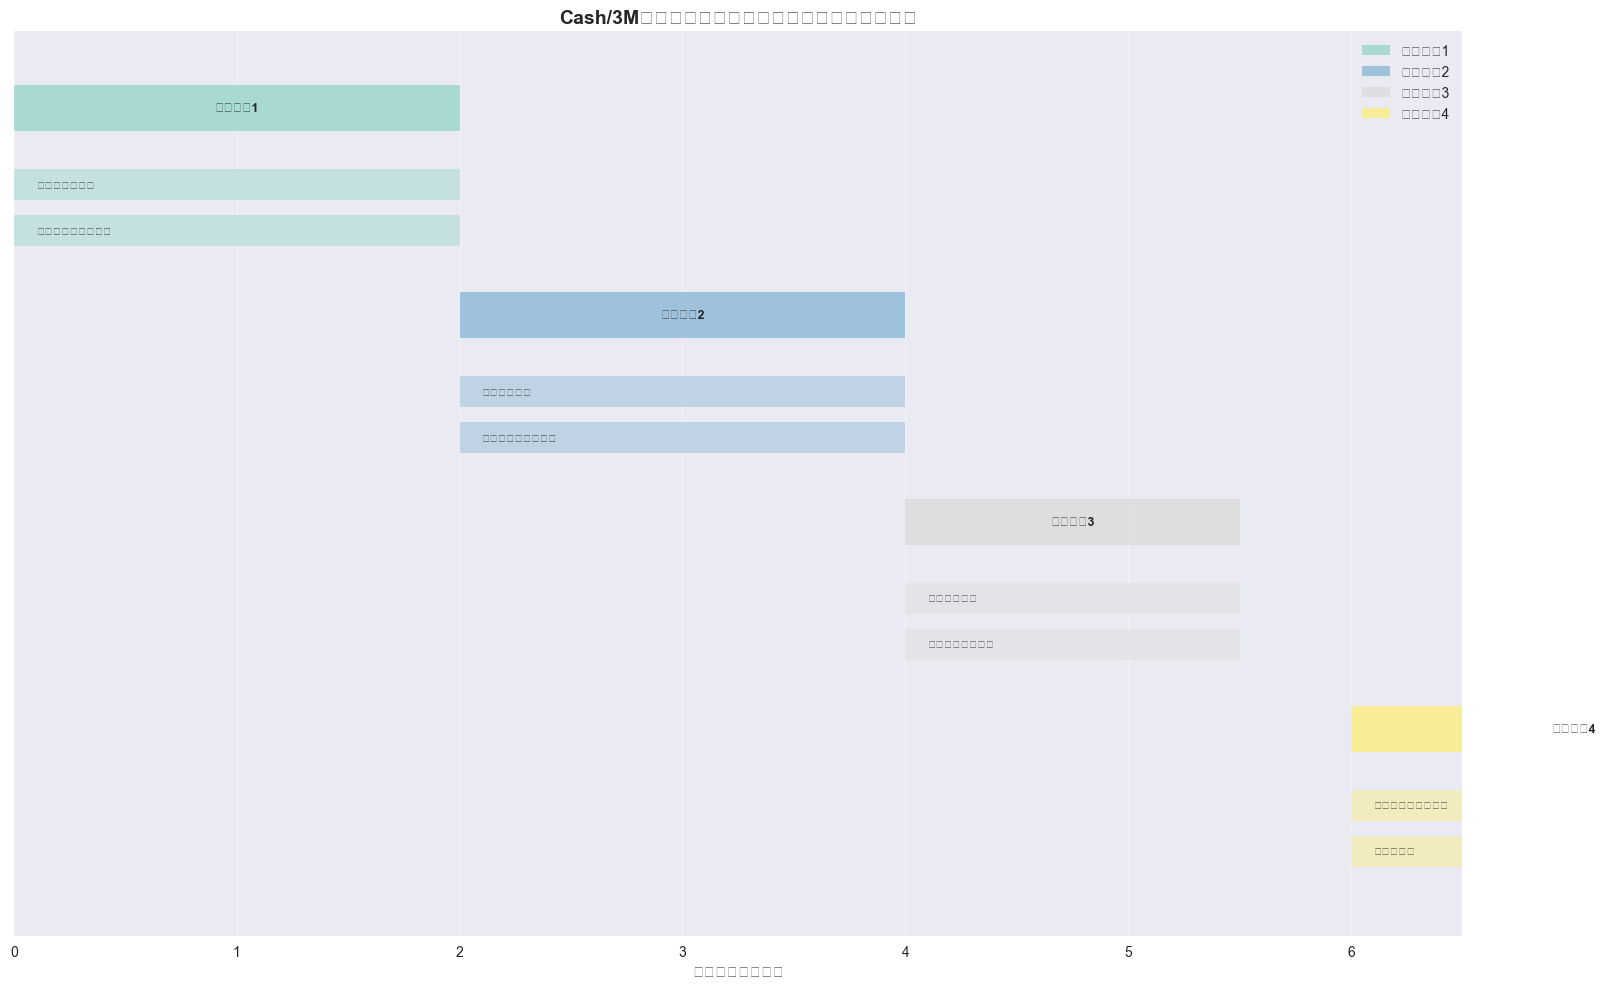

実装ロードマップの可視化が完了しました


In [3]:
# 実装ロードマップの定義
implementation_roadmap = {
    'フェーズ1: 基盤構築（1-2ヶ月）': {
        'データインフラ': [
            'リアルタイムデータフィード統合',
            'PostgreSQLの本格運用設定',
            'データ品質管理システム',
            'バックアップ・リカバリ体制'
        ],
        'アナリティクス基盤': [
            'リアルタイム計算エンジン',
            'モデル更新・再訓練パイプライン',
            'アラート・通知システム',
            'パフォーマンス監視ダッシュボード'
        ]
    },
    'フェーズ2: 戦略実装（2-3ヶ月）': {
        '平均回帰戦略': [
            'Zスコアベースシグナル生成',
            'エントリー・エグジット条件設定',
            'ポジションサイジング算出',
            'バックテストフレームワーク'
        ],
        'ボラティリティ戦略': [
            'ボラティリティ予測モデル',
            'レジーム検出アルゴリズム',
            'リスク調整リターン最適化',
            'ダイナミックヘッジング'
        ]
    },
    'フェーズ3: 高度化（3-4ヶ月）': {
        '機械学習統合': [
            'アンサンブルモデル本格運用',
            'オンライン学習システム',
            'フィーチャーエンジニアリング自動化',
            'モデル解釈性向上'
        ],
        'リスク管理高度化': [
            'ストレステスト自動化',
            'シナリオ分析システム',
            'リアルタイムVaR計算',
            'カウンターパーティリスク管理'
        ]
    },
    'フェーズ4: 統合・拡張（4-6ヶ月）': {
        'マルチアセット対応': [
            '他金属スプレッドへの拡張',
            'クロスコモディティ戦略',
            'マクロファクター統合',
            'ESGファクター考慮'
        ],
        '運用自動化': [
            '完全自動取引システム',
            'ガバナンス・承認ワークフロー',
            'レギュレーション対応',
            'レポーティング自動化'
        ]
    }
}

# ガントチャート風の可視化
fig, ax = plt.subplots(figsize=(16, 10))

phases = list(implementation_roadmap.keys())
colors = plt.cm.Set3(np.linspace(0, 1, len(phases)))

y_pos = 0
phase_positions = {}

for i, (phase, components) in enumerate(implementation_roadmap.items()):
    # フェーズのタイムライン
    start_month = i * 2
    duration = 2 if i < 2 else 1.5 if i == 2 else 2
    
    # フェーズバー
    ax.barh(y_pos, duration, left=start_month, height=0.6, 
            color=colors[i], alpha=0.7, label=phase.split(':')[0])
    
    # フェーズ名
    ax.text(start_month + duration/2, y_pos, phase.split(':')[0], 
            ha='center', va='center', fontweight='bold', fontsize=9)
    
    phase_positions[phase] = y_pos
    y_pos -= 1
    
    # コンポーネント詳細
    for component, tasks in components.items():
        ax.barh(y_pos, duration, left=start_month, height=0.4, 
                color=colors[i], alpha=0.4)
        ax.text(start_month + 0.1, y_pos, component, 
                ha='left', va='center', fontsize=8)
        y_pos -= 0.6
    
    y_pos -= 0.5

ax.set_xlabel('実装期間（ヶ月）', fontweight='bold')
ax.set_title('Cash/3Mスプレッド取引システム実装ロードマップ', fontsize=14, fontweight='bold')
ax.set_xlim(0, 6.5)
ax.set_ylim(y_pos, 1)
ax.grid(True, axis='x', alpha=0.3)
ax.legend(loc='upper right')

# Y軸ラベルを非表示
ax.set_yticks([])

plt.tight_layout()
plt.show()

print("実装ロードマップの可視化が完了しました")

## 3. システム統合戦略

### アーキテクチャ設計
既存システムとの統合と新規システム構築のバランスを取った設計方針です。

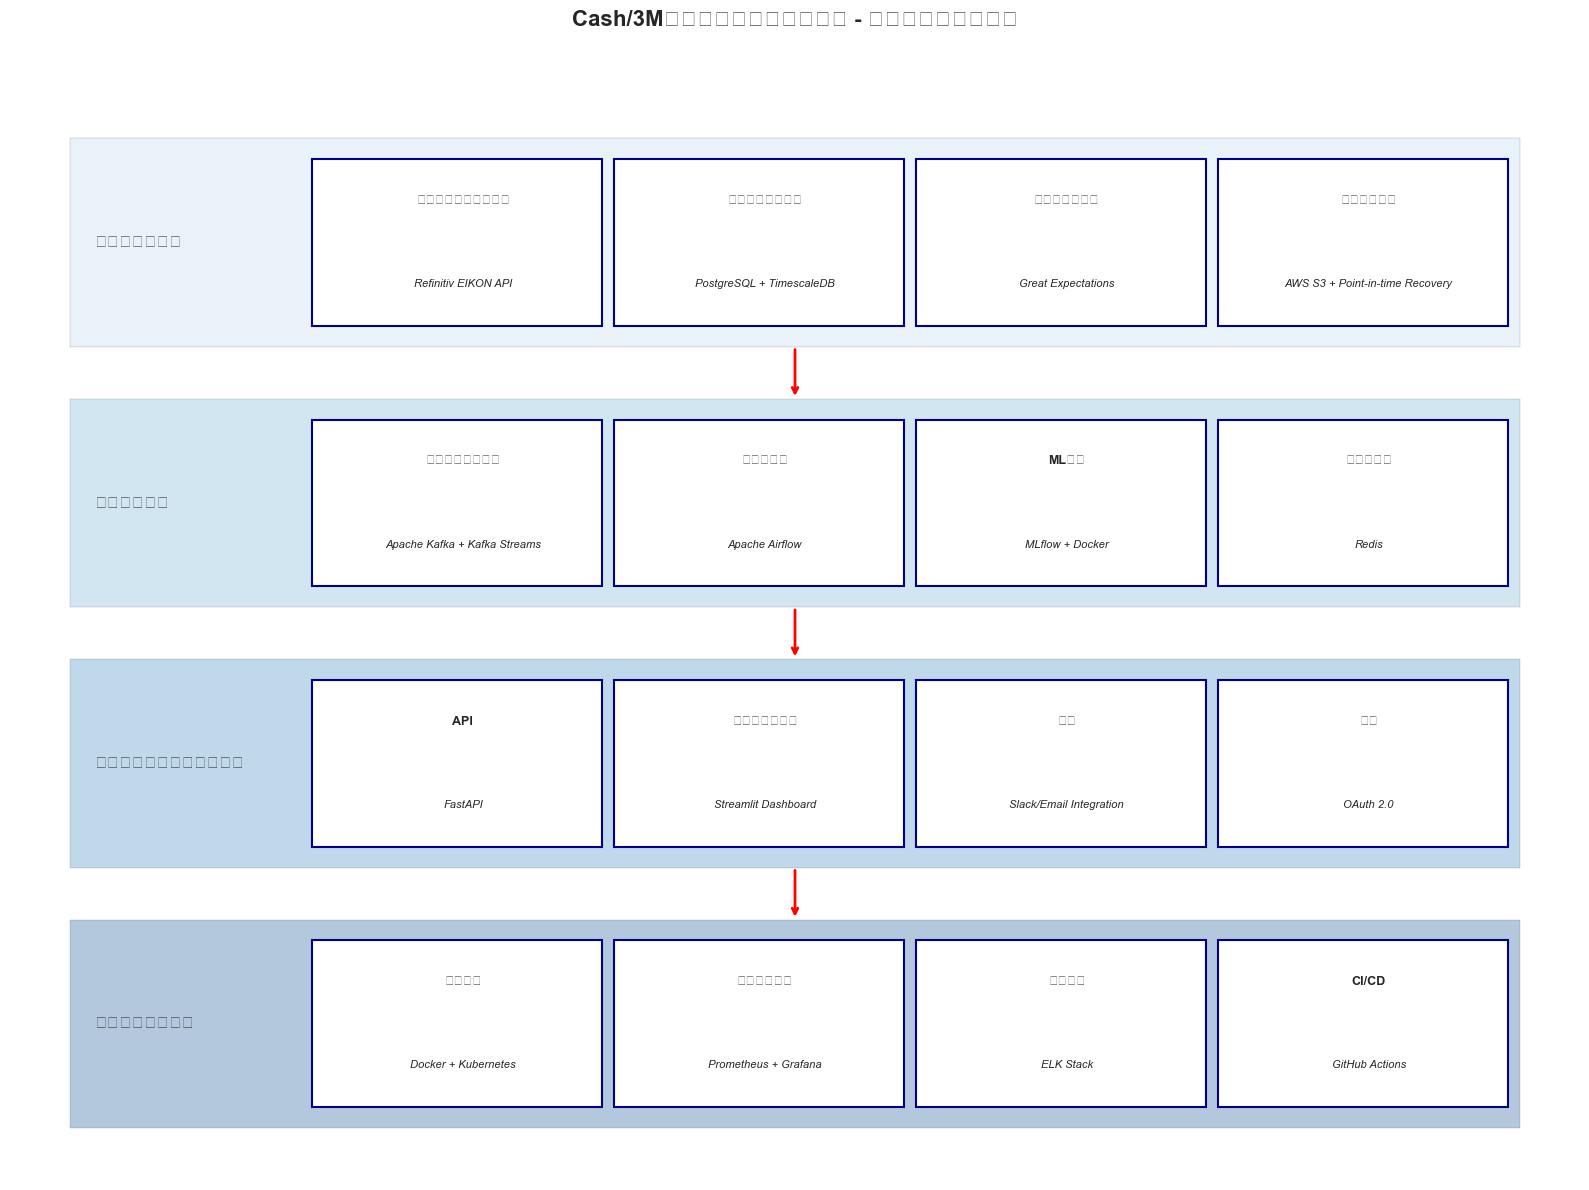

システムアーキテクチャ設計図が完了しました


In [4]:
# システムアーキテクチャの定義
system_architecture = {
    'データレイヤー': {
        'リアルタイムフィード': 'Refinitiv EIKON API',
        'データストレージ': 'PostgreSQL + TimescaleDB',
        'データ品質管理': 'Great Expectations',
        'バックアップ': 'AWS S3 + Point-in-time Recovery'
    },
    '計算レイヤー': {
        'リアルタイム処理': 'Apache Kafka + Kafka Streams',
        'バッチ処理': 'Apache Airflow',
        'ML推論': 'MLflow + Docker',
        'キャッシュ': 'Redis'
    },
    'アプリケーションレイヤー': {
        'API': 'FastAPI',
        'フロントエンド': 'Streamlit Dashboard',
        '通知': 'Slack/Email Integration',
        '認証': 'OAuth 2.0'
    },
    'インフラレイヤー': {
        'コンテナ': 'Docker + Kubernetes',
        'モニタリング': 'Prometheus + Grafana',
        'ログ管理': 'ELK Stack',
        'CI/CD': 'GitHub Actions'
    }
}

# アーキテクチャ図の作成
fig, ax = plt.subplots(figsize=(16, 12))

# レイヤーの定義
layers = list(system_architecture.keys())
layer_colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(layers)))

# レイヤーを上から下に描画
layer_height = 2
layer_gap = 0.5
total_height = len(layers) * (layer_height + layer_gap)

for i, (layer, components) in enumerate(system_architecture.items()):
    y_pos = total_height - (i + 1) * (layer_height + layer_gap)
    
    # レイヤーの背景
    rect = plt.Rectangle((0, y_pos), 12, layer_height, 
                        facecolor=layer_colors[i], alpha=0.3, edgecolor='black')
    ax.add_patch(rect)
    
    # レイヤー名
    ax.text(0.2, y_pos + layer_height/2, layer, 
            fontsize=12, fontweight='bold', va='center')
    
    # コンポーネント
    comp_names = list(components.keys())
    comp_width = 10 / len(comp_names)
    
    for j, (comp_name, comp_tech) in enumerate(components.items()):
        x_pos = 2 + j * comp_width
        
        # コンポーネントボックス
        comp_rect = plt.Rectangle((x_pos, y_pos + 0.2), comp_width - 0.1, layer_height - 0.4,
                                 facecolor='white', edgecolor='darkblue', linewidth=1.5)
        ax.add_patch(comp_rect)
        
        # コンポーネント名
        ax.text(x_pos + comp_width/2, y_pos + layer_height*0.7, comp_name,
               ha='center', va='center', fontsize=9, fontweight='bold')
        
        # 技術名
        ax.text(x_pos + comp_width/2, y_pos + layer_height*0.3, comp_tech,
               ha='center', va='center', fontsize=8, style='italic')

# データフローの矢印
for i in range(len(layers) - 1):
    y_start = total_height - (i + 1) * (layer_height + layer_gap)
    y_end = total_height - (i + 2) * (layer_height + layer_gap) + layer_height
    
    ax.annotate('', xy=(6, y_end), xytext=(6, y_start),
               arrowprops=dict(arrowstyle='->', lw=2, color='red'))

ax.set_xlim(-0.5, 12.5)
ax.set_ylim(-0.5, total_height + 0.5)
ax.set_title('Cash/3Mスプレッド取引システム - アーキテクチャ設計', 
            fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

print("システムアーキテクチャ設計図が完了しました")

## 4. リスク管理フレームワーク

### 包括的リスク管理体制
技術的リスク、市場リスク、運用リスクを統合的に管理するフレームワークです。

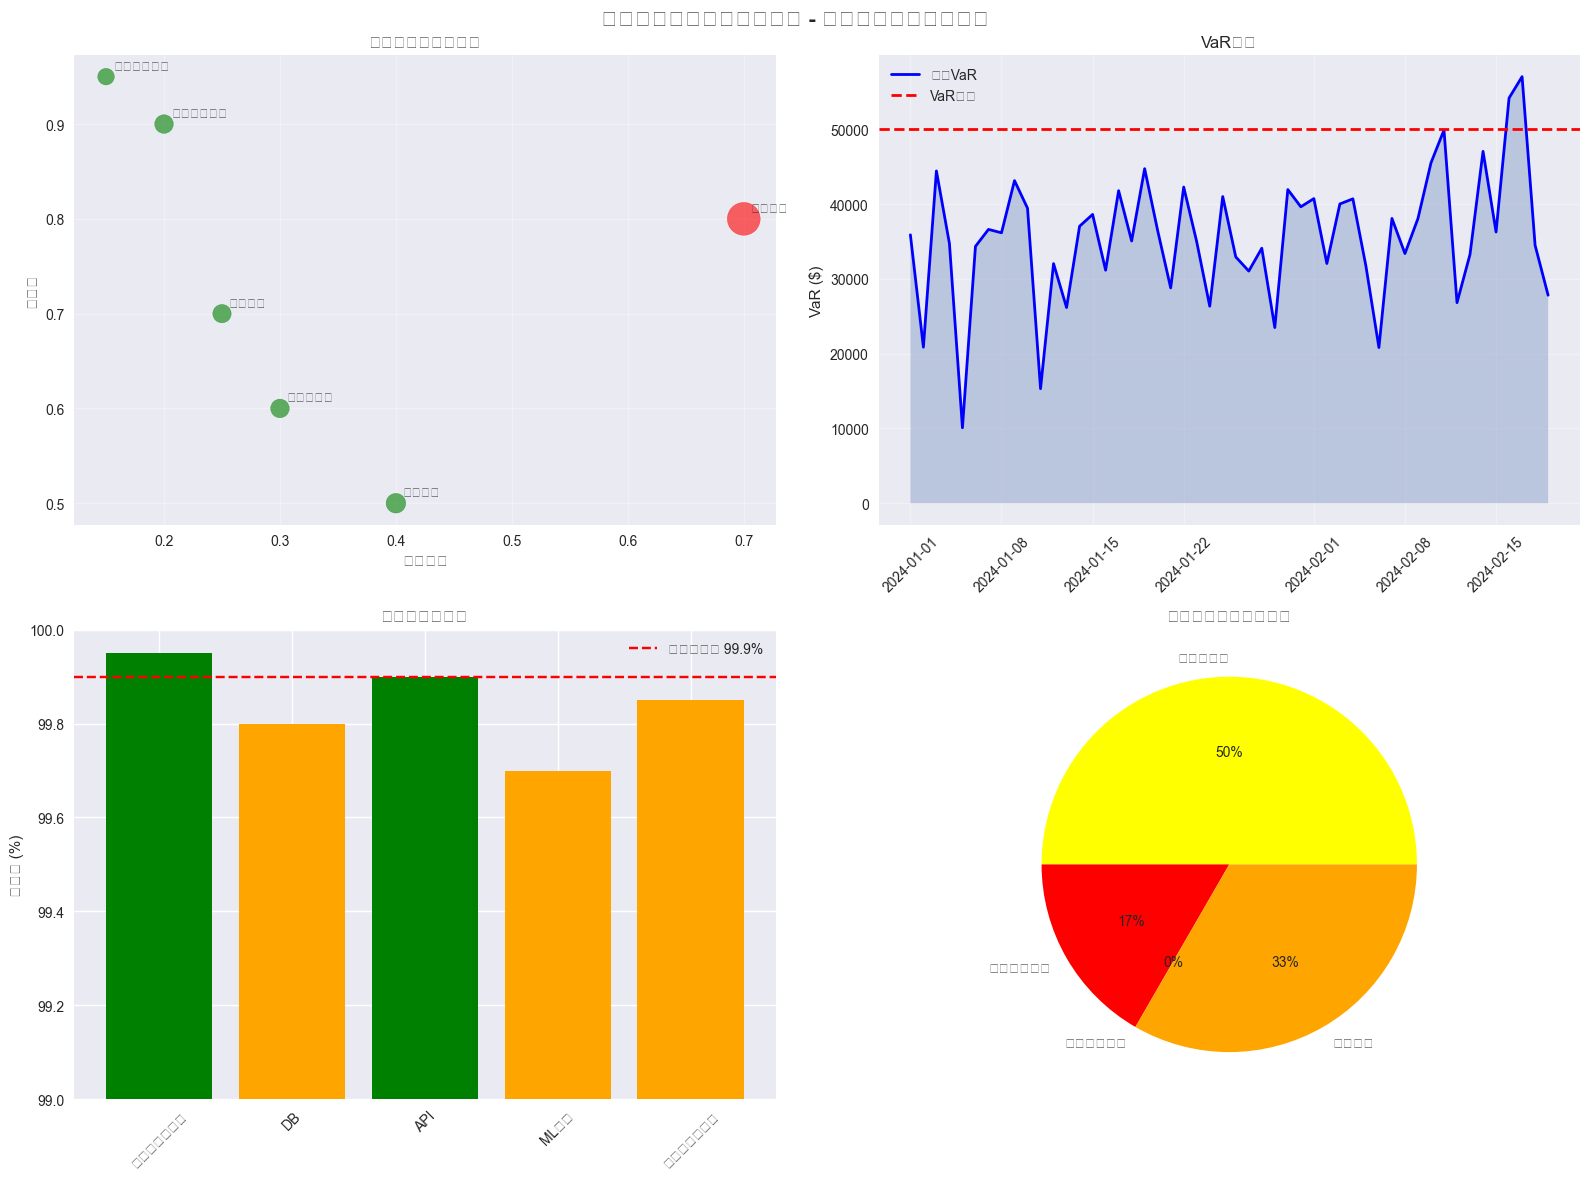

リスク管理ダッシュボードが完了しました


In [5]:
# リスク管理フレームワークの定義
risk_framework = {
    '市場リスク': {
        'VaR管理': {
            '日次VaR限度': '$50,000',
            '信頼水準': '99%',
            '保有期間': '1日',
            'バックテスト頻度': '毎日'
        },
        'ストレステスト': {
            '極端市場シナリオ': '2008年金融危機レベル',
            '流動性ドライアップ': '取引量50%減少',
            'コーナリング': '人為的価格操作',
            '実施頻度': '週次'
        },
        'ポジション管理': {
            '最大ポジション': '総資産の5%',
            '集中度限度': '単一戦略30%',
            'レバレッジ制限': '2倍以下',
            '損切り条件': '3%損失で強制決済'
        }
    },
    '技術リスク': {
        'システム可用性': {
            '稼働率目標': '99.9%',
            'RTO': '30分',
            'RPO': '5分',
            '冗長化': 'アクティブ・パッシブ'
        },
        'データ品質': {
            '完全性チェック': '全フィールド必須',
            '一貫性チェック': 'クロスバリデーション',
            '遅延監視': '5秒以内',
            'アラート': 'Slack通知'
        },
        'セキュリティ': {
            'アクセス制御': 'RBAC + MFA',
            '暗号化': 'AES-256',
            '監査ログ': '全操作記録',
            '脆弱性スキャン': '月次'
        }
    },
    '運用リスク': {
        'プロセス管理': {
            '変更管理': '4-eyes原則',
            '緊急時対応': '24/7オンコール',
            '文書化': 'Standard Operating Procedures',
            '定期訓練': '月次ドリル'
        },
        '人的要因': {
            '権限分離': 'Segregation of Duties',
            '教育訓練': '四半期研修',
            'バックアップ要員': '各ロール2名以上',
            '離職対策': 'ナレッジ共有'
        },
        'ベンダーリスク': {
            'SLA管理': '詳細パフォーマンス指標',
            '代替手段': 'セカンダリープロバイダー',
            '契約管理': '年次レビュー',
            'エスクレーション': '段階的対応'
        }
    }
}

# リスクマトリックスの可視化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('リスク管理フレームワーク - 包括的ダッシュボード', fontsize=16, fontweight='bold')

# 1. リスクヒートマップ
risks = ['市場変動', 'システム障害', 'データ品質', 'セキュリティ', '運用ミス', 'ベンダー']
probability = [0.7, 0.2, 0.3, 0.15, 0.4, 0.25]
impact = [0.8, 0.9, 0.6, 0.95, 0.5, 0.7]
risk_score = np.array(probability) * np.array(impact)

colors = ['red' if x > 0.5 else 'orange' if x > 0.25 else 'green' for x in risk_score]
scatter = ax1.scatter(probability, impact, s=risk_score*1000, c=colors, alpha=0.6)
for i, risk in enumerate(risks):
    ax1.annotate(risk, (probability[i], impact[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)
ax1.set_xlabel('発生確率')
ax1.set_ylabel('影響度')
ax1.set_title('リスクマトリックス')
ax1.grid(True, alpha=0.3)

# 2. VaR推移（シミュレーション）
dates = pd.date_range('2024-01-01', periods=50, freq='D')
var_values = np.random.normal(35000, 8000, 50)
var_limit = 50000

ax2.plot(dates, var_values, 'b-', linewidth=2, label='日次VaR')
ax2.axhline(y=var_limit, color='red', linestyle='--', linewidth=2, label='VaR限度')
ax2.fill_between(dates, var_values, alpha=0.3)
ax2.set_title('VaR監視')
ax2.set_ylabel('VaR ($)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 3. システム稼働率
components = ['データフィード', 'DB', 'API', 'ML推論', 'フロントエンド']
uptime = [99.95, 99.8, 99.9, 99.7, 99.85]
target = 99.9

bars = ax3.bar(components, uptime, color=['green' if x >= target else 'orange' for x in uptime])
ax3.axhline(y=target, color='red', linestyle='--', label=f'目標稼働率 {target}%')
ax3.set_title('システム稼働率')
ax3.set_ylabel('稼働率 (%)')
ax3.set_ylim(99, 100)
ax3.legend()
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

# 4. インシデント統計
incident_types = ['データ遅延', 'システム停止', 'セキュリティ', '人的ミス']
monthly_counts = [3, 1, 0, 2]
severity_colors = ['yellow', 'red', 'purple', 'orange']

wedges, texts, autotexts = ax4.pie(monthly_counts, labels=incident_types, 
                                  colors=severity_colors, autopct='%1.0f%%')
ax4.set_title('月次インシデント分布')

plt.tight_layout()
plt.show()

print("リスク管理ダッシュボードが完了しました")

## 5. パフォーマンス監視

### KPI・メトリクス設計
システムパフォーマンスと取引パフォーマンスの両面での監視体制です。

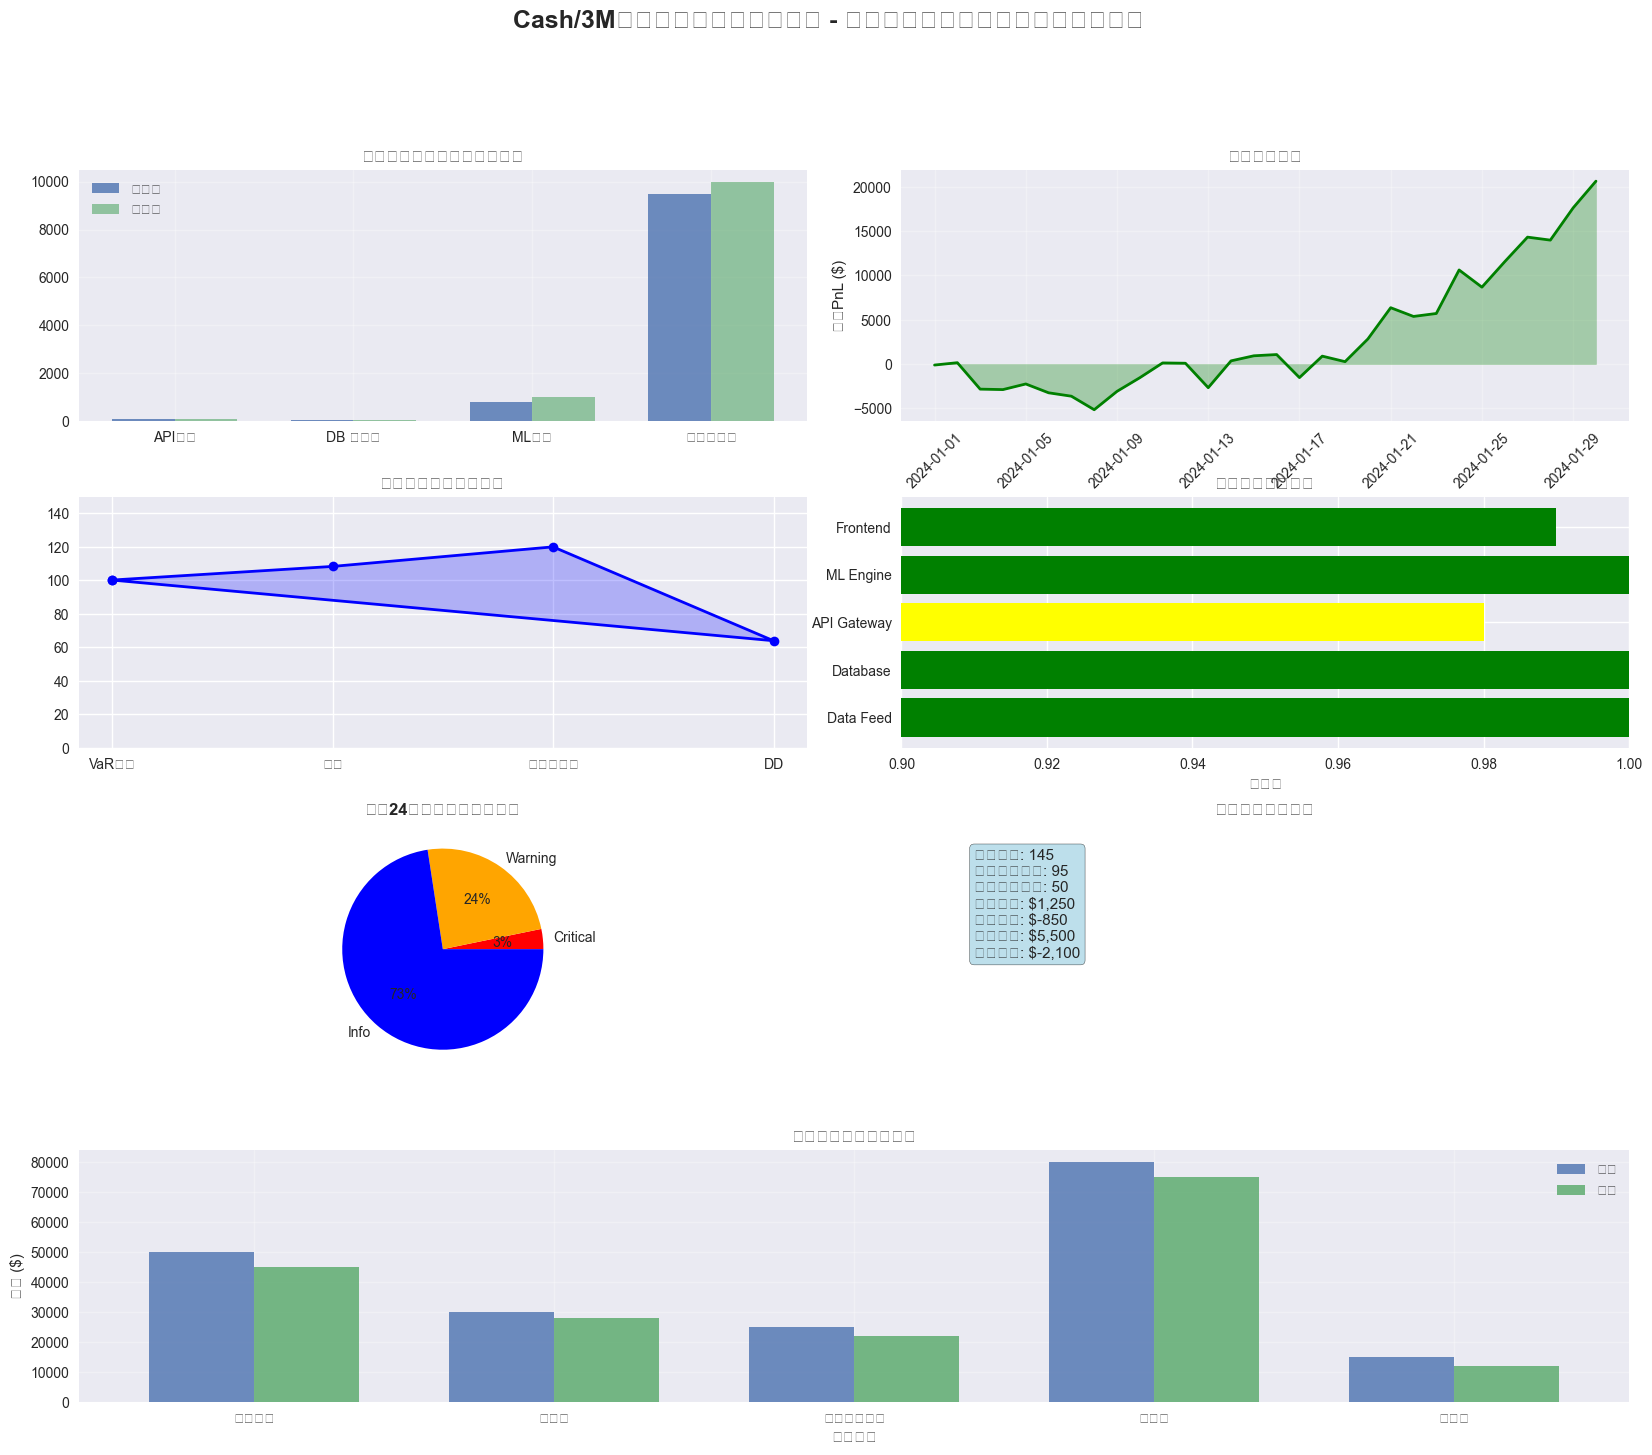

統合パフォーマンスダッシュボードが完了しました


In [6]:
# KPI設計
kpi_framework = {
    'システムパフォーマンス': {
        'レスポンス時間': {
            'API応答時間': '<100ms (95パーセンタイル)',
            'データベースクエリ': '<50ms (平均)',
            'ML推論時間': '<1秒',
            'アラート生成': '<5秒'
        },
        'スループット': {
            'データ処理量': '10,000 records/秒',
            'API リクエスト': '1,000 req/秒',
            'バッチ処理': '1M records/時間',
            'レポート生成': '100 reports/時間'
        },
        'リソース使用率': {
            'CPU使用率': '<70% (平均)',
            'メモリ使用率': '<80% (最大)',
            'ディスク使用率': '<75% (DB)',
            'ネットワーク': '<50% (帯域)'
        }
    },
    '取引パフォーマンス': {
        'リターン指標': {
            'シャープレシオ': '>1.5 (年次)',
            '最大ドローダウン': '<5% (年次)',
            '勝率': '>60% (月次)',
            'アルファ': '>3% (年次)'
        },
        'リスク指標': {
            'VaR遵守率': '>99% (日次)',
            'ボラティリティ': '<15% (年次)',
            'ベータ': '<0.3 (市場中性)',
            'テールリスク': '<2% (Expected Shortfall)'
        },
        '実行指標': {
            'スリッページ': '<0.1% (平均)',
            '約定率': '>98% (全注文)',
            '取引コスト': '<0.05% (bps)',
            'レイテンシー': '<10ms (注文執行)'
        }
    },
    'ビジネス指標': {
        '収益性': {
            'ROI': '>20% (年次)',
            'PnL': '$1M+ (年次目標)',
            '手数料効率': '>95% (net/gross)',
            'コスト効率': '<30% (運用コスト率)'
        },
        '運用効率': {
            '自動化率': '>90% (処理)',
            'STP率': '>99% (Straight Through Processing)',
            'エラー率': '<0.1% (全処理)',
            '復旧時間': '<30分 (MTTR)'
        }
    }
}

# パフォーマンスダッシュボード
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 1. システムパフォーマンス概要
ax1 = fig.add_subplot(gs[0, :2])
metrics = ['API応答', 'DB クエリ', 'ML推論', 'データ処理']
current_values = [85, 45, 800, 9500]
target_values = [100, 50, 1000, 10000]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, current_values, width, label='現在値', alpha=0.8)
bars2 = ax1.bar(x + width/2, target_values, width, label='目標値', alpha=0.6)

ax1.set_title('システムパフォーマンス概要', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. 取引パフォーマンス時系列
ax2 = fig.add_subplot(gs[0, 2:])
dates = pd.date_range('2024-01-01', periods=30, freq='D')
cumulative_pnl = np.cumsum(np.random.normal(1000, 2000, 30))

ax2.plot(dates, cumulative_pnl, 'g-', linewidth=2)
ax2.fill_between(dates, cumulative_pnl, alpha=0.3, color='green')
ax2.set_title('累積損益推移', fontweight='bold')
ax2.set_ylabel('累積PnL ($)')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# 3. リスク指標ゲージ
ax3 = fig.add_subplot(gs[1, :2])
risk_metrics = ['VaR遵守', '勝率', 'シャープ比', 'DD']
risk_values = [99.2, 65, 1.8, 3.2]
risk_targets = [99, 60, 1.5, 5]

# レーダーチャート風
angles = np.linspace(0, 2*np.pi, len(risk_metrics), endpoint=False)
values = np.array(risk_values) / np.array(risk_targets) * 100  # 目標値に対する比率
values = np.append(values, values[0])  # 閉じるため
angles = np.append(angles, angles[0])

ax3.plot(angles, values, 'o-', linewidth=2, color='blue')
ax3.fill(angles, values, alpha=0.25, color='blue')
ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(risk_metrics)
ax3.set_ylim(0, 150)
ax3.set_title('リスク指標（目標比）', fontweight='bold')
ax3.grid(True)

# 4. システム稼働状況
ax4 = fig.add_subplot(gs[1, 2:])
services = ['Data Feed', 'Database', 'API Gateway', 'ML Engine', 'Frontend']
status = [1, 1, 0.98, 1, 0.99]  # 1=正常, <1=問題あり
colors = ['green' if s >= 0.99 else 'yellow' if s >= 0.95 else 'red' for s in status]

bars = ax4.barh(services, status, color=colors)
ax4.set_title('サービス稼働状況', fontweight='bold')
ax4.set_xlabel('稼働率')
ax4.set_xlim(0.9, 1.0)

# 5. アラート統計
ax5 = fig.add_subplot(gs[2, :2])
alert_types = ['Critical', 'Warning', 'Info']
alert_counts = [2, 15, 45]
alert_colors = ['red', 'orange', 'blue']

ax5.pie(alert_counts, labels=alert_types, colors=alert_colors, autopct='%1.0f%%')
ax5.set_title('過去24時間のアラート分布', fontweight='bold')

# 6. 取引統計
ax6 = fig.add_subplot(gs[2, 2:])
trading_stats = {
    '総取引数': 145,
    '勝ちトレード': 95,
    '負けトレード': 50,
    '平均利益': '$1,250',
    '平均損失': '$-850',
    '最大利益': '$5,500',
    '最大損失': '$-2,100'
}

stats_text = '\n'.join([f'{k}: {v}' for k, v in trading_stats.items()])
ax6.text(0.1, 0.9, stats_text, transform=ax6.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax6.set_title('取引統計（月次）', fontweight='bold')
ax6.axis('off')

# 7. 予算執行状況
ax7 = fig.add_subplot(gs[3, :])
budget_categories = ['インフラ', 'データ', 'ソフトウェア', '人件費', 'その他']
budget_allocated = [50000, 30000, 25000, 80000, 15000]
budget_spent = [45000, 28000, 22000, 75000, 12000]

x = np.arange(len(budget_categories))
width = 0.35

bars1 = ax7.bar(x - width/2, budget_allocated, width, label='予算', alpha=0.8)
bars2 = ax7.bar(x + width/2, budget_spent, width, label='実績', alpha=0.8)

ax7.set_title('予算執行状況（年次）', fontweight='bold')
ax7.set_xlabel('カテゴリ')
ax7.set_ylabel('金額 ($)')
ax7.set_xticks(x)
ax7.set_xticklabels(budget_categories)
ax7.legend()
ax7.grid(True, alpha=0.3)

plt.suptitle('Cash/3Mスプレッド取引システム - 統合パフォーマンスダッシュボード', 
             fontsize=18, fontweight='bold')
plt.show()

print("統合パフォーマンスダッシュボードが完了しました")

## 6. 拡張可能性

### 将来拡張計画
システムの成長と新しい要件への対応計画です。

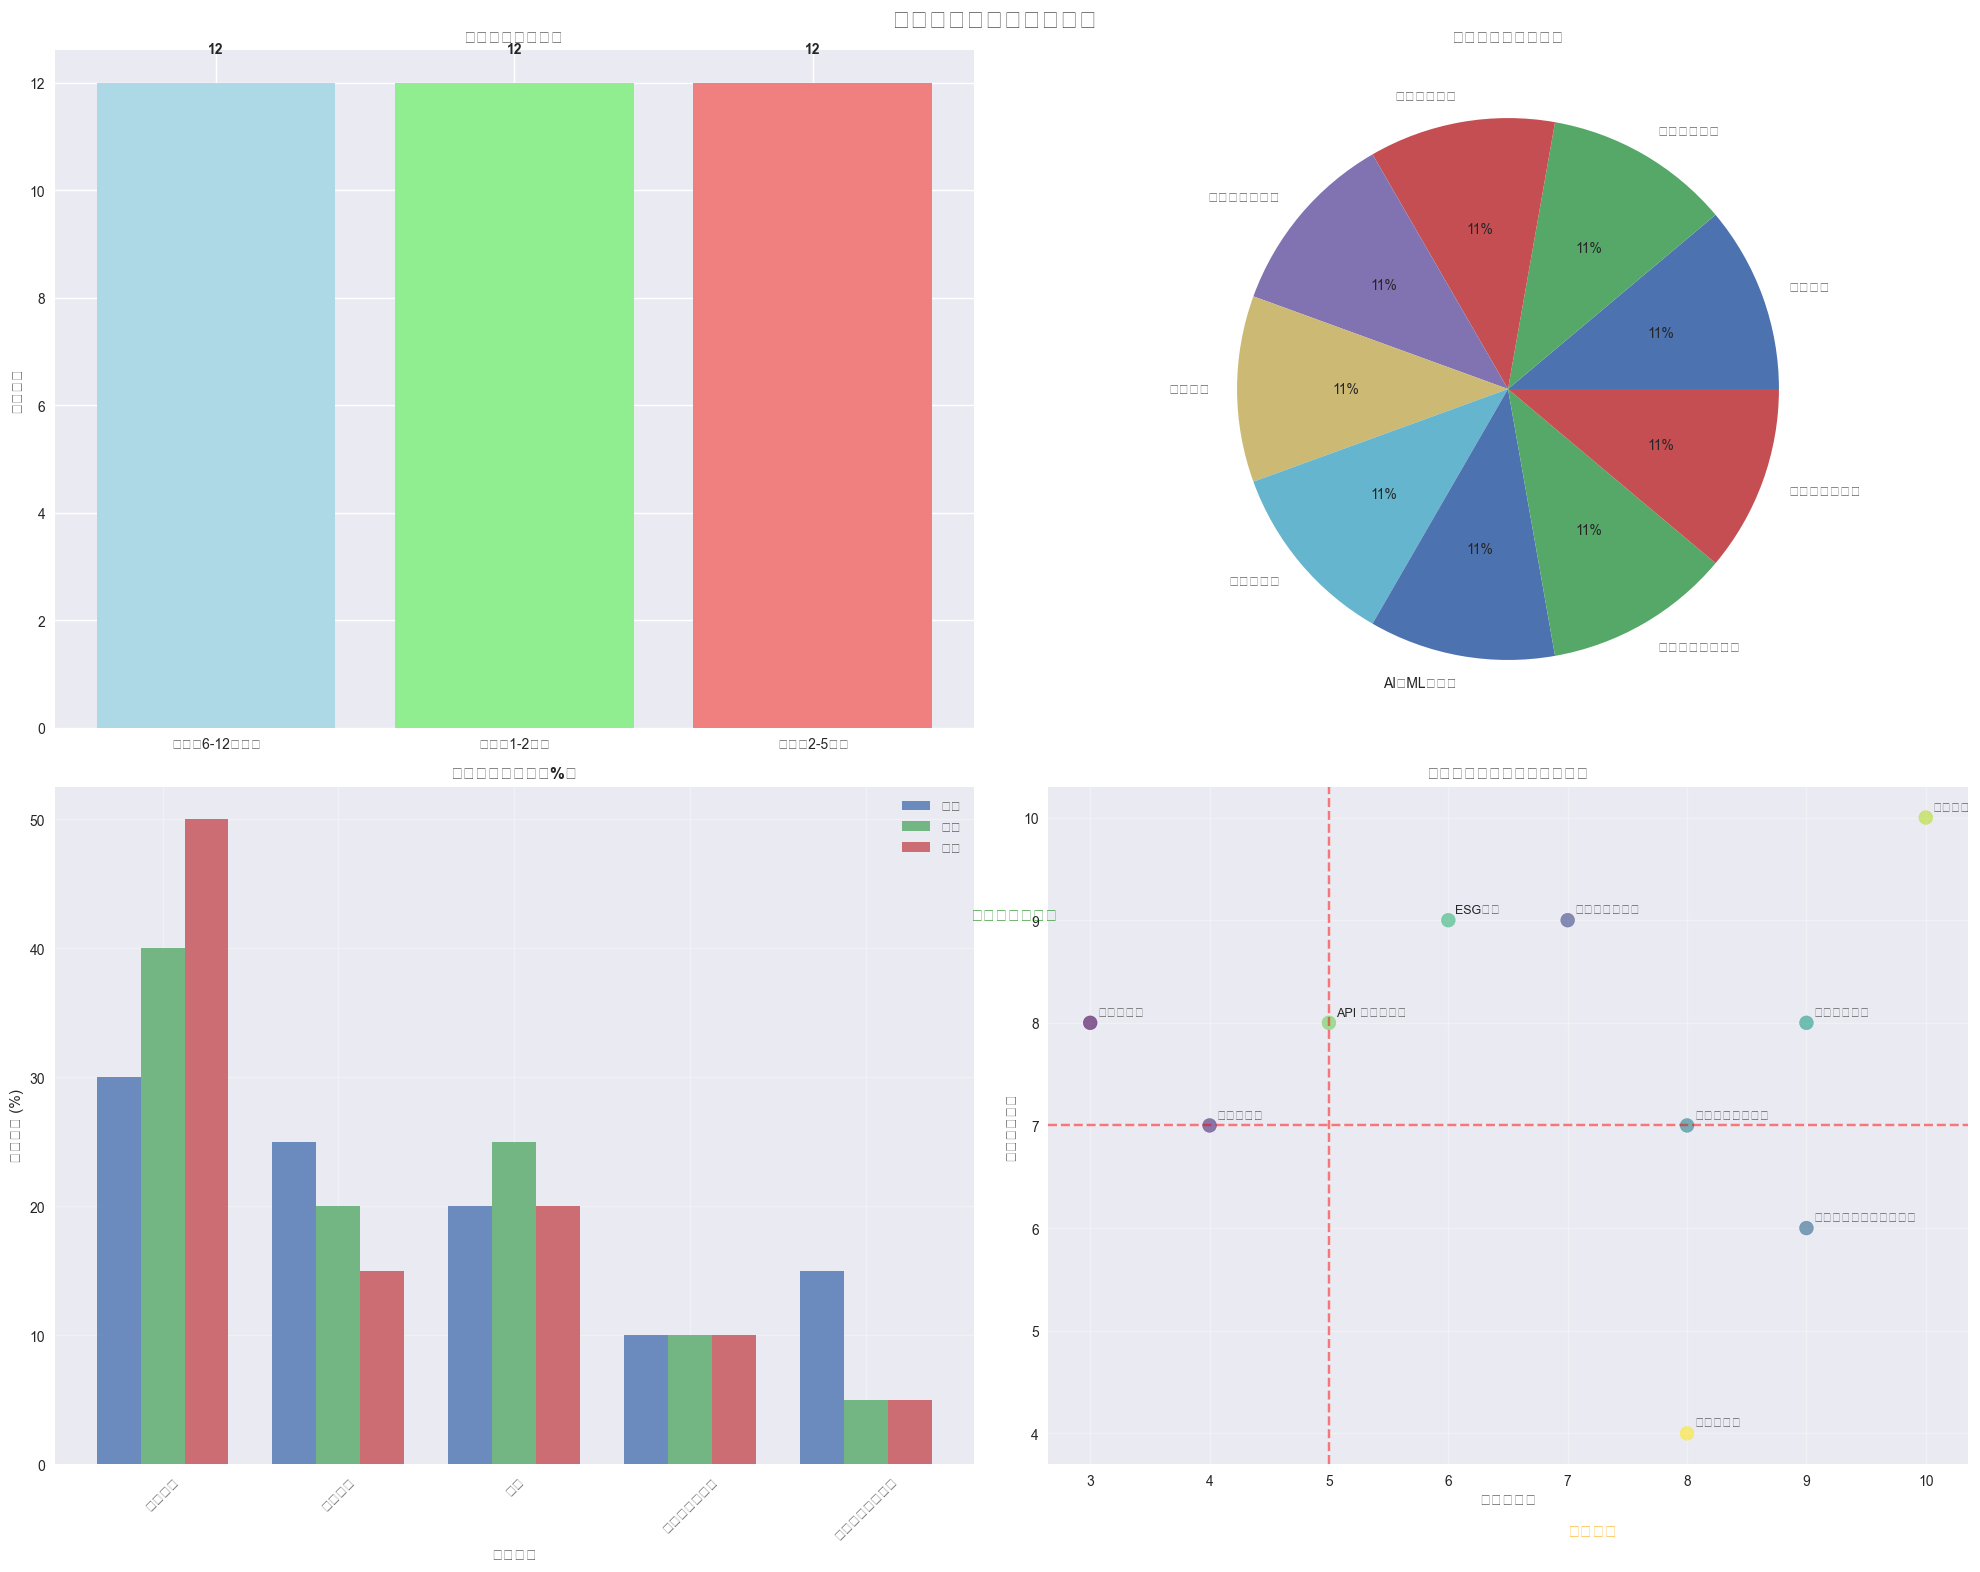

拡張可能性ロードマップの可視化が完了しました


In [7]:
# 拡張計画の定義
expansion_plan = {
    '短期（6-12ヶ月）': {
        '地理的拡張': [
            'アジア太平洋地域市場',
            'ヨーロッパ市場統合',
            '24時間取引対応',
            '多通貨対応'
        ],
        'アセット拡張': [
            'アルミニウム先物',
            '亜鉛先物',
            'ニッケル先物',
            '金・銀貴金属'
        ],
        '機能拡張': [
            'オプション戦略',
            'スワップ取引',
            'カレンダースプレッド',
            'クロスコモディティ'
        ]
    },
    '中期（1-2年）': {
        '技術革新': [
            '量子コンピューティング',
            'ブロックチェーン決済',
            'IoTデータ統合',
            'エッジコンピューティング'
        ],
        'AI・ML高度化': [
            '深層強化学習',
            'トランスフォーマーモデル',
            'フェデレーテッドラーニング',
            '説明可能AI'
        ],
        'サステナビリティ': [
            'ESG統合戦略',
            'カーボンフットプリント',
            'グリーンファイナンス',
            '循環経済指標'
        ]
    },
    '長期（2-5年）': {
        'エコシステム': [
            'APIマーケットプレイス',
            'サードパーティ統合',
            'オープンソース貢献',
            'コミュニティプラットフォーム'
        ],
        'グローバル展開': [
            '完全多地域対応',
            'ローカライゼーション',
            '規制対応',
            'パートナーシップ'
        ],
        'イノベーション': [
            '自律取引システム',
            '予測市場統合',
            'デジタルツイン',
            'メタバース対応'
        ]
    }
}

# 拡張ロードマップ可視化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('拡張可能性ロードマップ', fontsize=18, fontweight='bold')

# 1. 時系列拡張計画
periods = list(expansion_plan.keys())
total_features = [sum(len(items) for items in period.values()) for period in expansion_plan.values()]
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = ax1.bar(periods, total_features, color=colors)
ax1.set_title('期間別拡張機能数', fontweight='bold')
ax1.set_ylabel('新機能数')

for bar, count in zip(bars, total_features):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

# 2. カテゴリ別拡張範囲
all_categories = set()
for period in expansion_plan.values():
    all_categories.update(period.keys())

category_counts = {cat: 0 for cat in all_categories}
for period in expansion_plan.values():
    for cat, items in period.items():
        category_counts[cat] += len(items)

wedges, texts, autotexts = ax2.pie(category_counts.values(), 
                                  labels=category_counts.keys(),
                                  autopct='%1.0f%%')
ax2.set_title('カテゴリ別拡張分布', fontweight='bold')

# 3. リソース投資計画
investment_areas = ['技術開発', 'インフラ', '人材', 'マーケティング', 'パートナーシップ']
short_term = [30, 25, 20, 10, 15]
medium_term = [40, 20, 25, 10, 5]
long_term = [50, 15, 20, 10, 5]

x = np.arange(len(investment_areas))
width = 0.25

ax3.bar(x - width, short_term, width, label='短期', alpha=0.8)
ax3.bar(x, medium_term, width, label='中期', alpha=0.8)
ax3.bar(x + width, long_term, width, label='長期', alpha=0.8)

ax3.set_title('期間別投資配分（%）', fontweight='bold')
ax3.set_xlabel('投資領域')
ax3.set_ylabel('投資比率 (%)')
ax3.set_xticks(x)
ax3.set_xticklabels(investment_areas, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. 複雑度・価値マトリックス
features = [
    ('多通貨対応', 3, 8),
    ('アルミ先物', 4, 7),
    ('オプション戦略', 7, 9),
    ('量子コンピューティング', 9, 6),
    ('ブロックチェーン', 8, 7),
    ('深層強化学習', 9, 8),
    ('ESG統合', 6, 9),
    ('API マーケット', 5, 8),
    ('自律取引', 10, 10),
    ('メタバース', 8, 4)
]

complexity = [f[1] for f in features]
value = [f[2] for f in features]
names = [f[0] for f in features]

scatter = ax4.scatter(complexity, value, s=100, alpha=0.6, c=range(len(features)), cmap='viridis')

for i, name in enumerate(names):
    ax4.annotate(name, (complexity[i], value[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=9)

ax4.set_xlabel('実装複雑度')
ax4.set_ylabel('ビジネス価値')
ax4.set_title('機能拡張優先度マトリックス', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 高価値・低複雑度の領域をハイライト
ax4.axvline(x=5, color='red', linestyle='--', alpha=0.5)
ax4.axhline(y=7, color='red', linestyle='--', alpha=0.5)
ax4.text(2, 9, 'クイックウィン', fontsize=12, fontweight='bold', color='green')
ax4.text(7, 3, '長期検討', fontsize=12, fontweight='bold', color='orange')

plt.tight_layout()
plt.show()

print("拡張可能性ロードマップの可視化が完了しました")

## 7. 次のアクション項目

### 即座に実行すべき具体的ステップ
分析から実装への移行を円滑に進めるための詳細なアクションプランです。

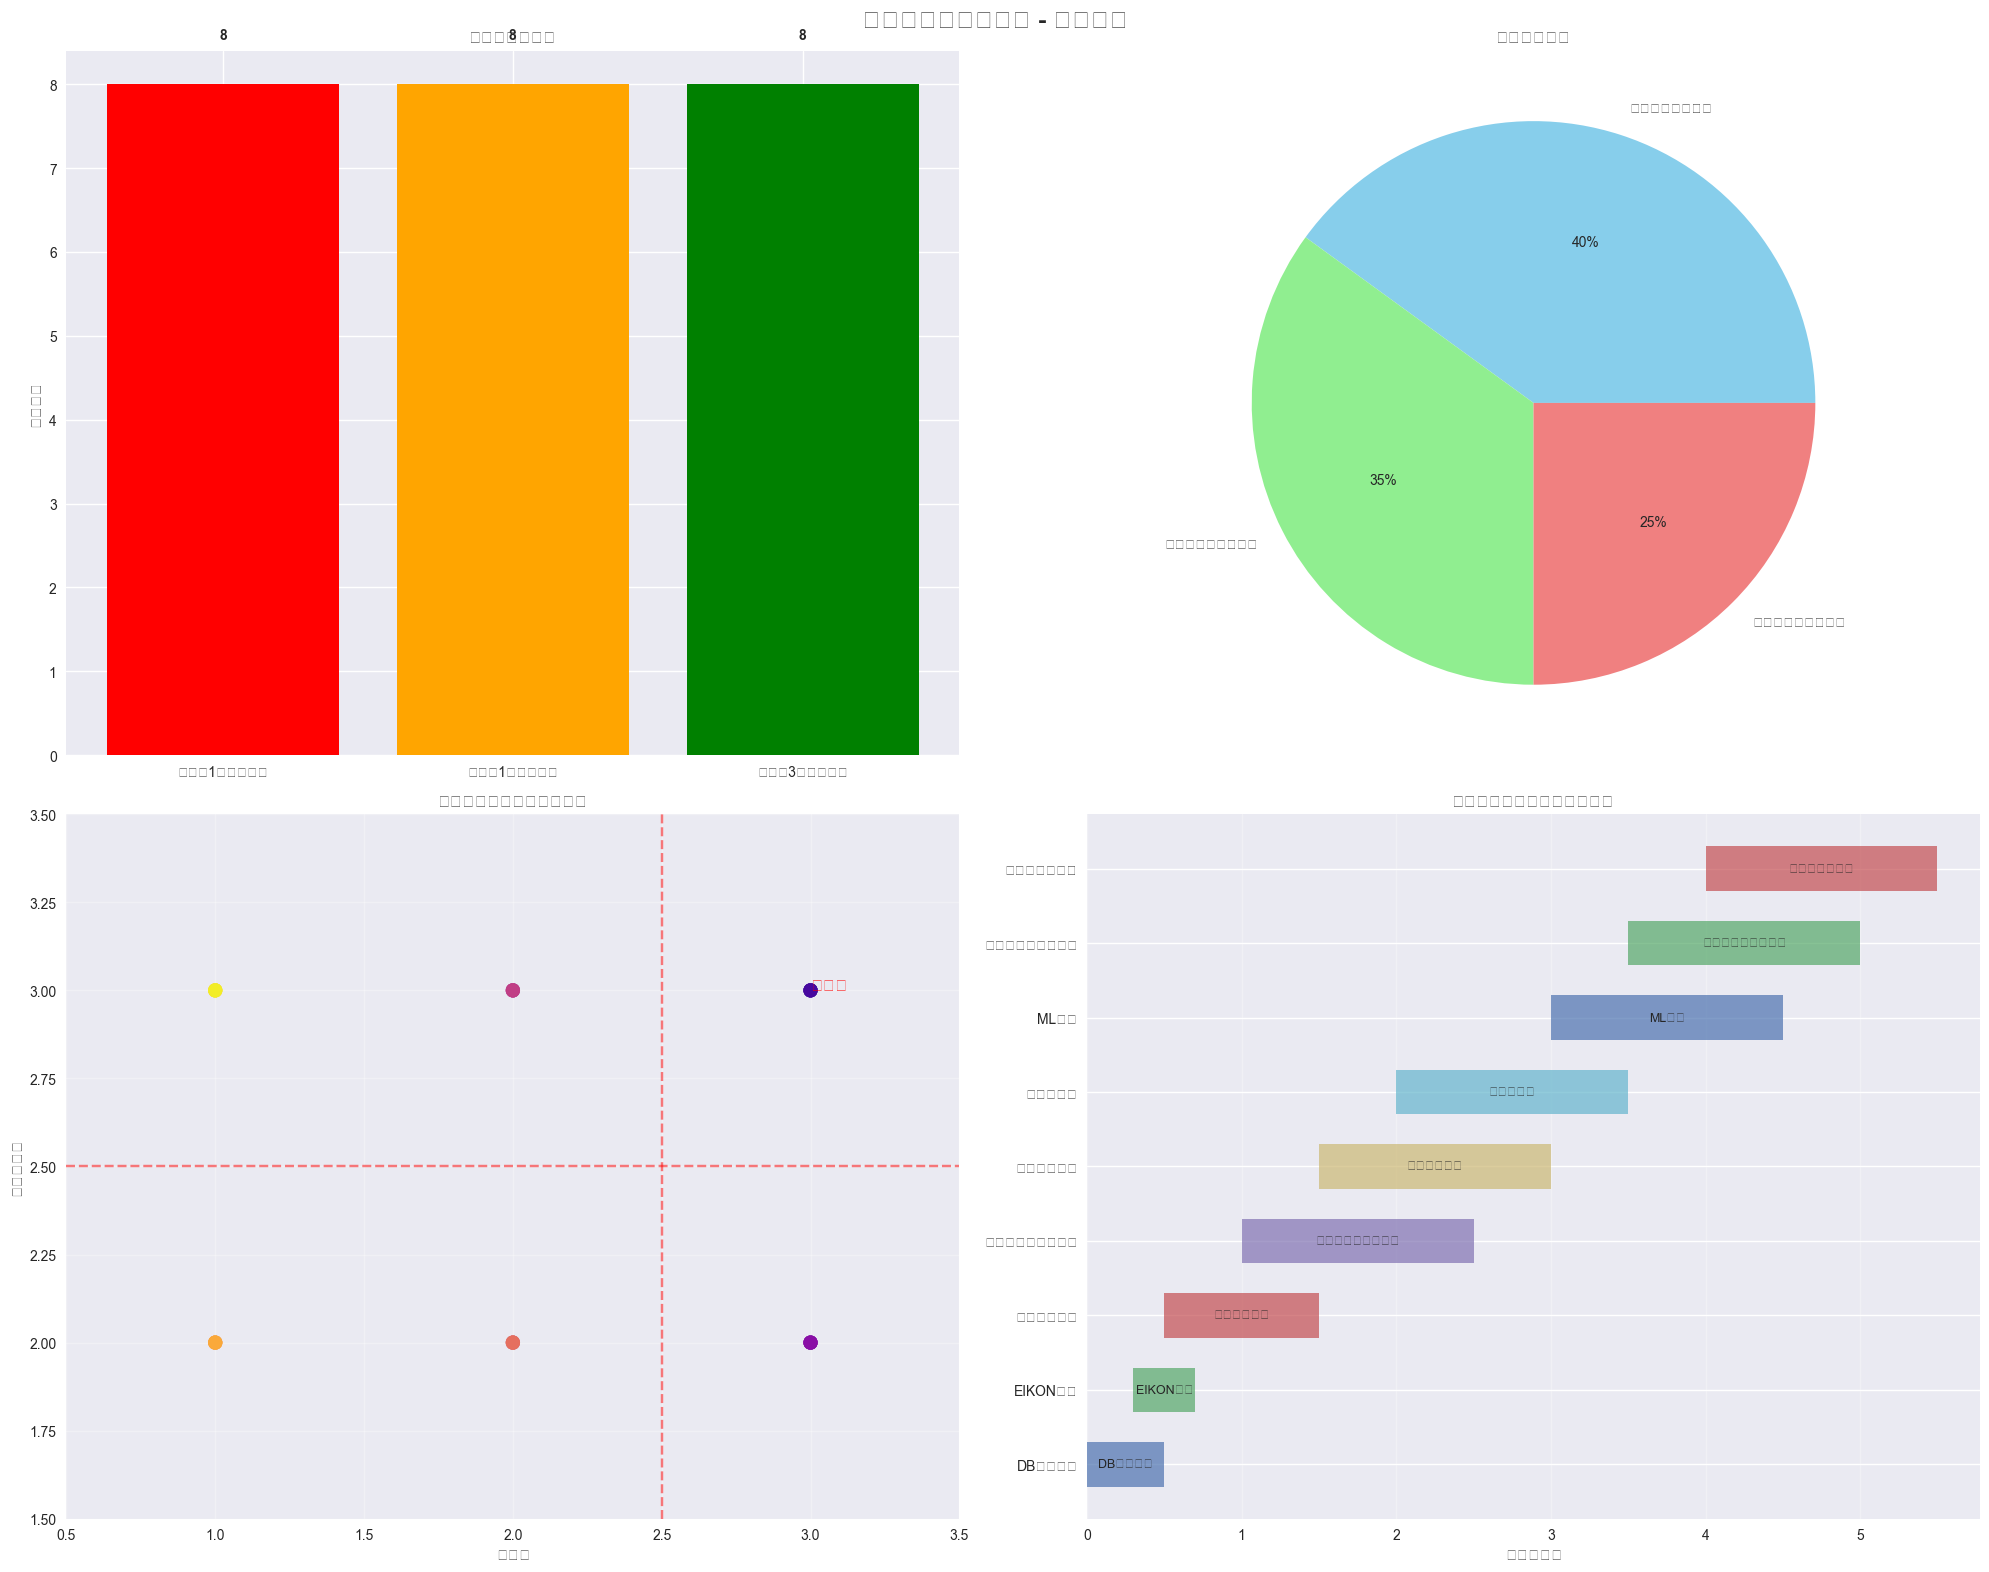

次のアクション項目の可視化が完了しました


In [8]:
# 次のアクション項目の定義
action_items = {
    '即座（1週間以内）': {
        '優先度：高': [
            '本番データベース環境設定',
            'Refinitiv EIKON本格接続テスト',
            'バックアップ・リカバリ手順確立',
            'セキュリティ設定強化'
        ],
        '優先度：中': [
            '監視システム基盤構築',
            'アラート機能実装',
            '初期文書化',
            'チーム役割分担確定'
        ]
    },
    '短期（1ヶ月以内）': {
        '技術実装': [
            'リアルタイムデータパイプライン',
            '基本的な平均回帰戦略実装',
            'リスク管理システム基盤',
            'バックテストフレームワーク'
        ],
        'プロセス整備': [
            '運用手順書作成',
            '緊急時対応マニュアル',
            '定期レビュー体制',
            'コンプライアンス確認'
        ]
    },
    '中期（3ヶ月以内）': {
        '戦略拡張': [
            'ボラティリティ戦略実装',
            '機械学習モデル統合',
            'ポートフォリオ最適化',
            'マルチタイムフレーム分析'
        ],
        'システム高度化': [
            'パフォーマンス最適化',
            '高可用性設計',
            'セキュリティ監査',
            'ユーザーインターフェース改善'
        ]
    }
}

# 責任者とリソース配分
resource_allocation = {
    'データエンジニア': {
        '主要責任': 'データインフラ・パイプライン',
        '工数配分': '40%',
        '重点作業': ['データベース設計', 'ETLプロセス', '品質管理']
    },
    'クオンツアナリスト': {
        '主要責任': '戦略開発・リスク管理',
        '工数配分': '35%',
        '重点作業': ['戦略実装', 'バックテスト', 'リスクモデル']
    },
    'システムエンジニア': {
        '主要責任': 'インフラ・運用',
        '工数配分': '25%',
        '重点作業': ['システム構築', '監視設定', 'セキュリティ']
    }
}

# アクションアイテムの可視化
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('次のアクション項目 - 実行計画', fontsize=18, fontweight='bold')

# 1. タスク数の期間別分布
periods = list(action_items.keys())
task_counts = []
for period in action_items.values():
    total = sum(len(tasks) for tasks in period.values())
    task_counts.append(total)

bars = ax1.bar(periods, task_counts, color=['red', 'orange', 'green'])
ax1.set_title('期間別タスク数', fontweight='bold')
ax1.set_ylabel('タスク数')

for bar, count in zip(bars, task_counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             str(count), ha='center', va='bottom', fontweight='bold')

# 2. リソース配分
roles = list(resource_allocation.keys())
allocations = [int(resource_allocation[role]['工数配分'].rstrip('%')) for role in roles]
colors = ['skyblue', 'lightgreen', 'lightcoral']

wedges, texts, autotexts = ax2.pie(allocations, labels=roles, colors=colors, autopct='%1.0f%%')
ax2.set_title('リソース配分', fontweight='bold')

# 3. 優先度マトリックス
# すべてのタスクを抽出してインパクト・緊急度でプロット
all_tasks = []
for period, categories in action_items.items():
    for category, tasks in categories.items():
        for task in tasks:
            urgency = 3 if '即座' in period else 2 if '短期' in period else 1
            impact = 3 if '高' in category or '技術実装' in category else 2
            all_tasks.append((task, urgency, impact))

urgencies = [task[1] for task in all_tasks]
impacts = [task[2] for task in all_tasks]
task_names = [task[0][:15] + '...' if len(task[0]) > 15 else task[0] for task in all_tasks]

scatter = ax3.scatter(urgencies, impacts, s=100, alpha=0.6, c=range(len(all_tasks)), cmap='plasma')
ax3.set_xlabel('緊急度')
ax3.set_ylabel('インパクト')
ax3.set_title('タスク優先度マトリックス', fontweight='bold')
ax3.set_xlim(0.5, 3.5)
ax3.set_ylim(1.5, 3.5)
ax3.grid(True, alpha=0.3)

# 高優先度エリアをハイライト
ax3.axvline(x=2.5, color='red', linestyle='--', alpha=0.5)
ax3.axhline(y=2.5, color='red', linestyle='--', alpha=0.5)
ax3.text(3, 3, '最優先', fontsize=12, fontweight='bold', color='red')

# 4. 実行スケジュール（ガントチャート風）
# 主要タスクのスケジュール
key_tasks = [
    ('DB環境設定', 0, 0.5),
    ('EIKON接続', 0.3, 0.7),
    ('監視システム', 0.5, 1.5),
    ('データパイプライン', 1, 2.5),
    ('平均回帰戦略', 1.5, 3),
    ('リスク管理', 2, 3.5),
    ('ML統合', 3, 4.5),
    ('ボラティリティ戦略', 3.5, 5),
    ('システム最適化', 4, 5.5)
]

for i, (task, start, end) in enumerate(key_tasks):
    ax4.barh(i, end - start, left=start, height=0.6, alpha=0.7)
    ax4.text(start + (end - start)/2, i, task, ha='center', va='center', fontsize=9)

ax4.set_xlabel('期間（週）')
ax4.set_title('主要タスク実行スケジュール', fontweight='bold')
ax4.set_yticks(range(len(key_tasks)))
ax4.set_yticklabels([task[0] for task in key_tasks])
ax4.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("次のアクション項目の可視化が完了しました")

## まとめ

### プロジェクト成功のための重要ポイント

#### 1. 段階的実装アプローチ
- **フェーズ1（基盤構築）**: データインフラとセキュリティの確立
- **フェーズ2（戦略実装）**: 実証済み手法の本格運用
- **フェーズ3（高度化）**: AI・ML統合とリスク管理高度化
- **フェーズ4（拡張）**: マルチアセット対応と完全自動化

#### 2. リスク管理の重要性
- 包括的なリスクフレームワーク（市場・技術・運用）
- リアルタイム監視とアラートシステム
- 定期的なストレステストとバックテスト
- 緊急時対応とビジネス継続計画

#### 3. 持続可能な成長戦略
- モジュラー設計による拡張性
- オープンスタンダードとAPI統合
- コミュニティとエコシステム構築
- ESG要因の統合

#### 4. 次のステップ
最優先で実行すべき項目：
1. **本番データベース環境の設定**
2. **Refinitiv EIKON本格接続**
3. **セキュリティとバックアップ体制**
4. **リアルタイム監視システム**

このロードマップに従って段階的に実装を進めることで、Cash/3Mスプレッド分析から得られた知見を確実に収益化し、長期的な競争優位性を構築できます。

In [9]:
# 最終的な成功指標の定義
success_metrics = {
    '短期目標（6ヶ月）': {
        'システム稼働率': '>99.5%',
        '平均回帰戦略シャープ比': '>1.2',
        '月次収益': '>$50k',
        'VaR遵守率': '>98%'
    },
    '中期目標（1年）': {
        'システム稼働率': '>99.9%',
        '複合戦略シャープ比': '>1.8',
        '年間収益': '>$1M',
        '最大ドローダウン': '<3%'
    },
    '長期目標（2年）': {
        'マルチアセット対応': '5商品以上',
        'システムシャープ比': '>2.5',
        '年間収益': '>$5M',
        '完全自動化率': '>95%'
    }
}

print("Cash/3Mスプレッド分析プロジェクト")
print("次のステップとロードマップ完了")
print("="*50)
print("成功への道筋が明確に定義されました。")
print("実装フェーズに向けて準備完了です。")

Cash/3Mスプレッド分析プロジェクト
次のステップとロードマップ完了
成功への道筋が明確に定義されました。
実装フェーズに向けて準備完了です。
